In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('C:/Users/ubq3/Documents/GitHub/instructors/data/HW6_data.csv')
df.head(10)
# check if there is NaN in the dataset
print(df.info())
#Drop NaNs if there is any
df.dropna(inplace=True)

# Count number of entries for different class_target
print(df['target_class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB
None
0.0    84

In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

C:\Users\ubq3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ubq3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 9273 samples in 0.016s...
[t-SNE] Computed neighbors for 9273 samples in 0.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9273
[t-SNE] Computed conditional probabilities for sample 2000 / 9273
[t-SNE] Computed conditional probabilities for sample 3000 / 9273
[t-SNE] Computed conditional probabilities for sample 4000 / 9273
[t-SNE] Computed conditional probabilities for sample 5000 / 9273
[t-SNE] Computed conditional probabilities for sample 6000 / 9273
[t-SNE] Computed conditional probabilities for sample 7000 / 9273
[t-SNE] Computed conditional probabilities for sample 8000 / 9273
[t-SNE] Computed conditional probabilities for sample 9000 / 9273
[t-SNE] Computed conditional probabilities for sample 9273 / 9273
[t-SNE] Mean sigma: 4.444941
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.653687
[t-SNE] KL divergence after 300 iterations: 2.173056


In [24]:
df_imbalanced=pd.DataFrame()
df_imbalanced['target_class']=df['target_class'].values

In [25]:
df_imbalanced['TSNE_ONE']=tsne_results[:,0]
df_imbalanced['TSNE_TWO']=tsne_results[:,1]

<AxesSubplot:xlabel='TSNE_ONE', ylabel='TSNE_TWO'>

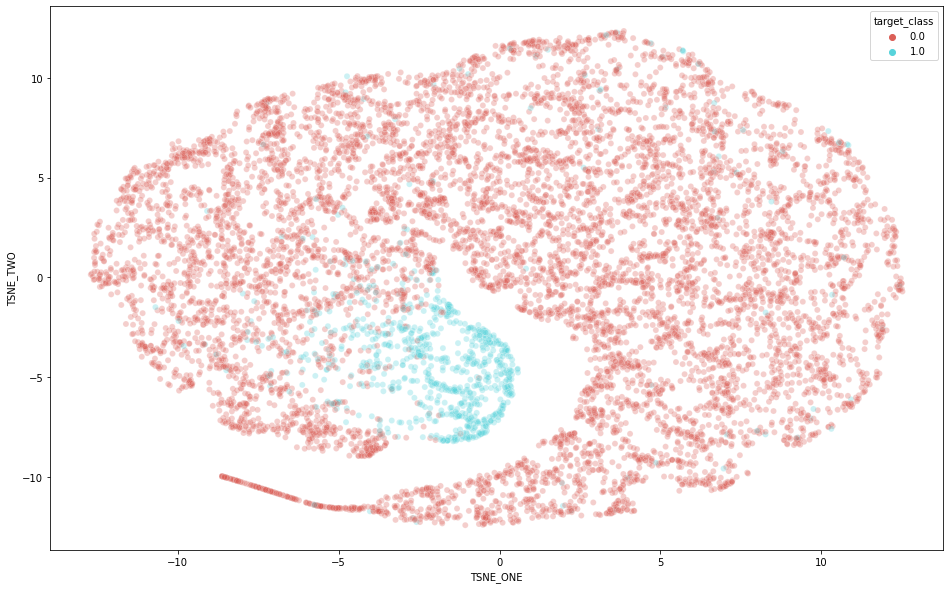

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="TSNE_ONE", y="TSNE_TWO",
    hue="target_class",
    palette=sns.color_palette("hls", 2),
    data=df_imbalanced,
    legend="full",
    alpha=0.3
)

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

In [28]:
df_imbalanced['pca-one'] = pca_result[:,0]
df_imbalanced['pca-two'] = pca_result[:,1] 

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

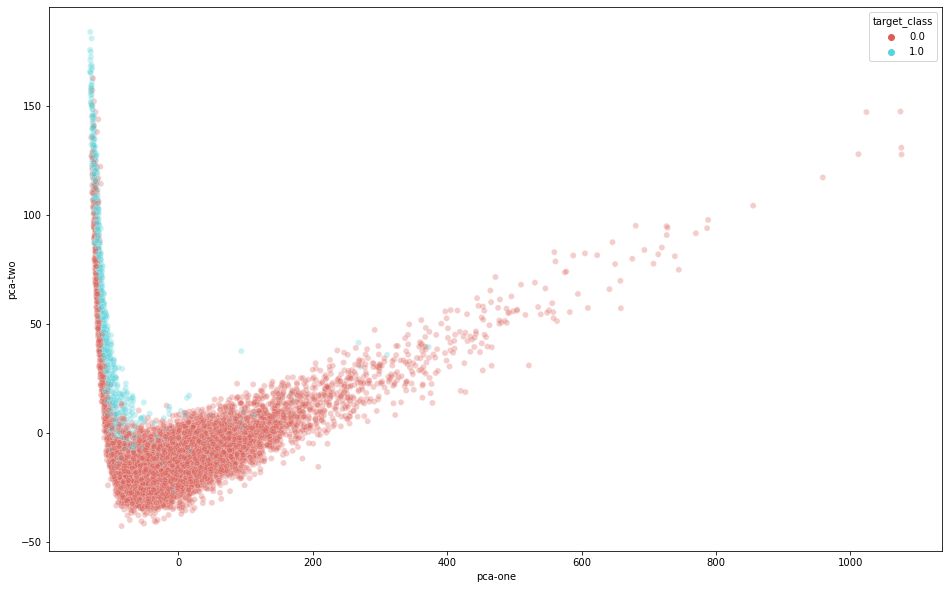

In [29]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target_class",
    palette=sns.color_palette("hls", 2),
    data=df_imbalanced,
    legend="full",
    alpha=0.3
)

In [30]:
from imblearn.over_sampling import RandomOverSampler

In [31]:
X=df.drop('target_class',axis=1)

In [32]:
ros = RandomOverSampler(random_state=42,sampling_strategy='auto')
X_res, y_res=ros.fit_resample(X,df['target_class'])

In [33]:
X_res.shape

(16846, 8)

In [34]:
y_res.value_counts()

0.0    8423
1.0    8423
Name: target_class, dtype: int64

In [35]:
df['target_class'].value_counts()

0.0    8423
1.0     850
Name: target_class, dtype: int64

In [36]:
pca = PCA(n_components=2)
pca_result_new = pca.fit_transform(X_res)

In [37]:
df_balanced=pd.DataFrame()

In [38]:
df_balanced['PCA_ONE']=pca_result_new[:,0]
df_balanced['PCA_TWO']=pca_result_new[:,1]
df_balanced['target_class']=y_res

<AxesSubplot:xlabel='PCA_ONE', ylabel='PCA_TWO'>

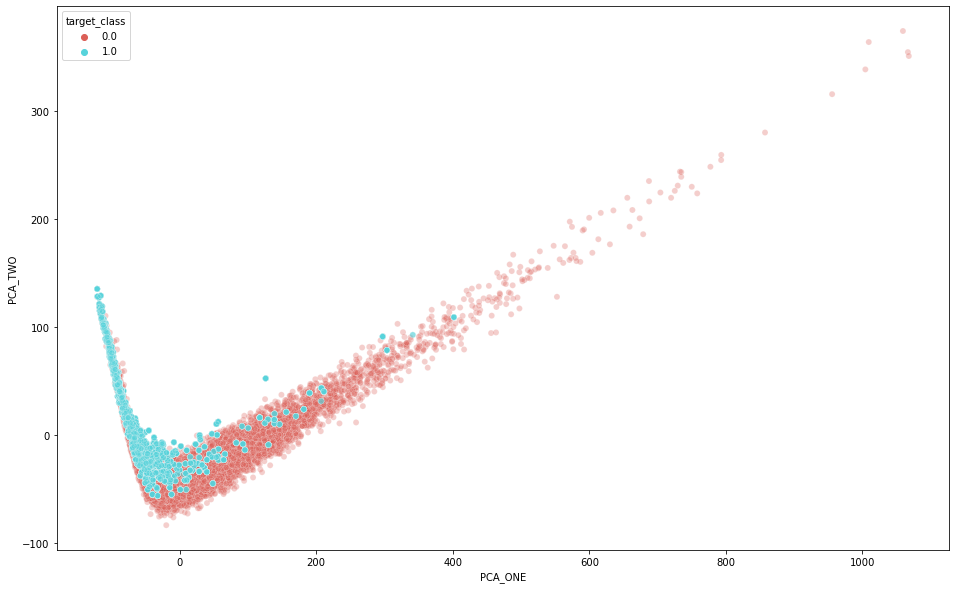

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA_ONE", y="PCA_TWO",
    hue="target_class",
    palette=sns.color_palette("hls", 2),
    data=df_balanced,
    legend="full",
    alpha=0.3
)

In [40]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_new = tsne.fit_transform(X_res)

C:\Users\ubq3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ubq3\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 16846 samples in 0.030s...
[t-SNE] Computed neighbors for 16846 samples in 0.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16846
[t-SNE] Computed conditional probabilities for sample 2000 / 16846
[t-SNE] Computed conditional probabilities for sample 3000 / 16846
[t-SNE] Computed conditional probabilities for sample 4000 / 16846
[t-SNE] Computed conditional probabilities for sample 5000 / 16846
[t-SNE] Computed conditional probabilities for sample 6000 / 16846
[t-SNE] Computed conditional probabilities for sample 7000 / 16846
[t-SNE] Computed conditional probabilities for sample 8000 / 16846
[t-SNE] Computed conditional probabilities for sample 9000 / 16846
[t-SNE] Computed conditional probabilities for sample 10000 / 16846
[t-SNE] Computed conditional probabilities for sample 11000 / 16846
[t-SNE] Computed conditional probabilities for sample 12000 / 16846
[t-SNE] Computed conditional probabilities for sa

In [41]:
df_balanced['TSNE_ONE']=tsne_results_new[:,0]
df_balanced['TSNE_TWO']=tsne_results_new[:,1]

<AxesSubplot:xlabel='TSNE_ONE', ylabel='TSNE_TWO'>

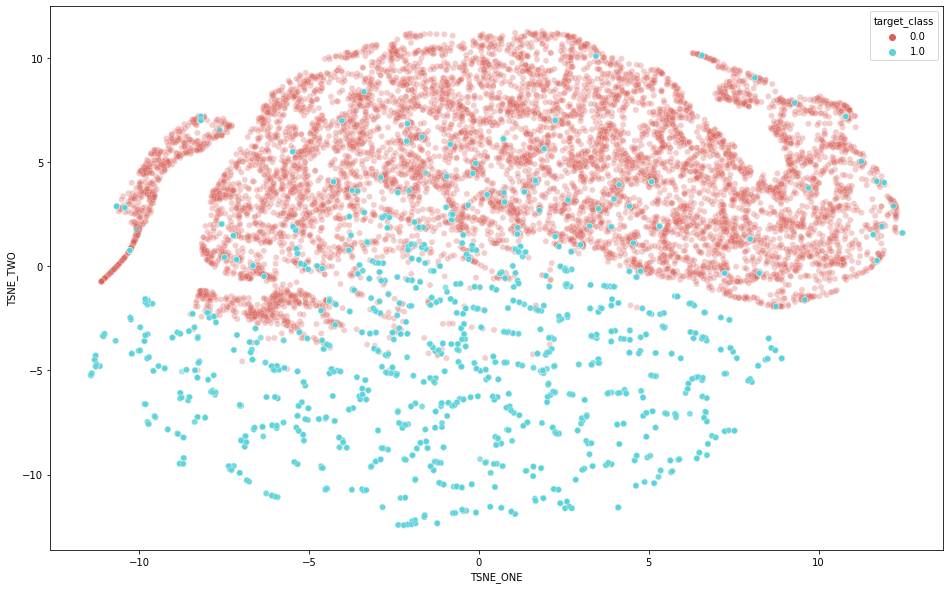

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="TSNE_ONE", y="TSNE_TWO",
    hue="target_class",
    palette=sns.color_palette("hls", 2),
    data=df_balanced,
    legend="full",
    alpha=0.3
)